In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales_April_2019.csv')
df.shape

(18383, 6)

In [3]:
### Task 1: Merge the 12 months of sales data into a single CSV file



In [4]:
import os

folder_path = r"C:\Users\hp\Desktop\JUPYTER\Sales_Data"

list_files = os.listdir(folder_path)

for file in list_files:
    print(file)

.ipynb_checkpoints
Project_Sales_Analysis.ipynb
sales data analysis.ipynb
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
for file in list_files:
    if '.csv' in file:
        print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
df = pd.DataFrame()
df

""


In [7]:
df.shape

(0, 0)

In [8]:
for file in list_files:
    if '.csv' in file:
        file_df = pd.read_csv(file)
        df = pd.concat([df, file_df])

df.shape

(186850, 6)

In [9]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [11]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
#### Removing the NaN/Null values


In [13]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df.dropna(how='all')
df.shape

(186305, 6)

In [15]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
df = df[df['Order ID'] != 'Order ID']
df.shape

(185950, 6)

In [18]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [19]:
#### Change the dtypes of the columns to appropriate dtypes


In [20]:
df.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

In [21]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [22]:
df['price_each'] = df['price_each'].astype('float')

In [23]:
df['quantity_ordered'] = df['quantity_ordered'].astype('int32')

df['order_id'] = df['order_id'].astype('int64')

In [24]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed')

In [25]:
df.dtypes

order_id                     int64
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [26]:


#### Question 1: What was the best month for sales? How much was earned that month?

#### Task : Add Month column


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int32         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 9.2+ MB


In [28]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [29]:
df['order_date'].dt.to_period('M').unique()

<PeriodArray>
['2019-04', '2019-05', '2019-08', '2019-09', '2019-12', '2020-01', '2019-02',
 '2019-03', '2019-01', '2019-07', '2019-06', '2019-11', '2019-10']
Length: 13, dtype: period[M]

In [30]:
df['month'] = df['order_date'].dt.to_period('M')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04


In [31]:
df[df['month'] == '2020-01'].shape ## remove these 2020-01 month data as we are only focusing in the year 2019 data.

(34, 7)

In [32]:
df = df[df['month'] != '2020-01']
df.shape

(185916, 7)

In [33]:
## Drop the Duplicated rows/data


In [34]:
df.drop_duplicates(inplace=True)
df.shape

(185652, 7)

In [35]:
# add the sales column

df['sales'] = df['quantity_ordered']*df['price_each']
df.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99


In [36]:
# Total Order Count each month

df.groupby('month')['order_id'].count()

month
2019-01     9665
2019-02    11957
2019-03    15128
2019-04    18257
2019-05    16552
2019-06    13535
2019-07    14275
2019-08    11943
2019-09    11603
2019-10    20249
2019-11    17544
2019-12    24944
Freq: M, Name: order_id, dtype: int64

In [37]:
# Total Sales each month

df.groupby('month')['sales'].sum()

month
2019-01    1812742.87
2019-02    2200078.08
2019-03    2804973.35
2019-04    3389217.98
2019-05    3150616.23
2019-06    2576280.15
2019-07    2646461.32
2019-08    2241083.37
2019-09    2094465.69
2019-10    3734777.86
2019-11    3197875.05
2019-12    4608295.70
Freq: M, Name: sales, dtype: float64

<Axes: xlabel='month'>

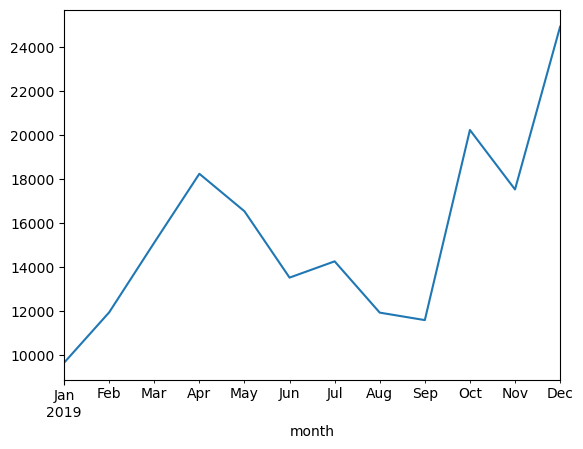

In [38]:
df.groupby('month')['order_id'].count().plot(kind='line')

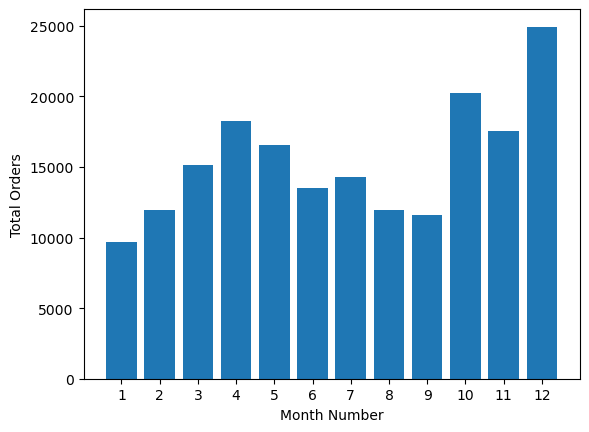

In [39]:
months = range(1,13)

plt.bar(months, df.groupby('month')['order_id'].count())
plt.xticks(months)
plt.ylabel('Total Orders')
plt.xlabel('Month Number')

plt.show()

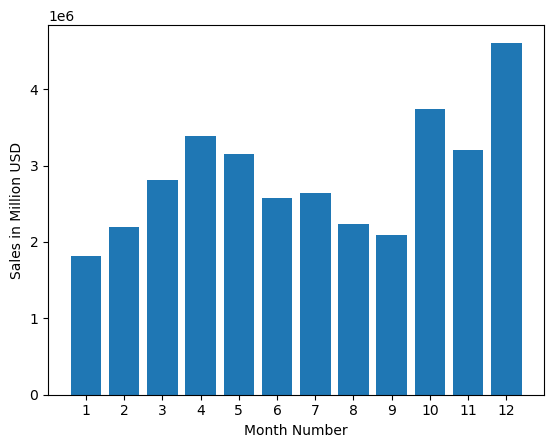

In [40]:
months = range(1,13)

plt.bar(months, df.groupby('month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in Million USD')
plt.xlabel('Month Number')

plt.show()

In [41]:
#### Question 2: What city had the highest number of sales?

#### Task: Add a city and sales column.

In [42]:
df.purchase_address

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: purchase_address, Length: 185652, dtype: object

In [43]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['purchase_address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [44]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA)


In [45]:
df.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA)


In [46]:
df.groupby('city')['order_id'].count()

city
 Atlanta (GA)          14863
 Austin (TX)            9888
 Boston (MA)           19897
 Dallas (TX)           14795
 Los Angeles (CA)      29563
 New York City (NY)    24837
 Portland (ME)          2451
 Portland (OR)          9996
 San Francisco (CA)    44650
 Seattle (WA)          14712
Name: order_id, dtype: int64

<Axes: xlabel='city'>

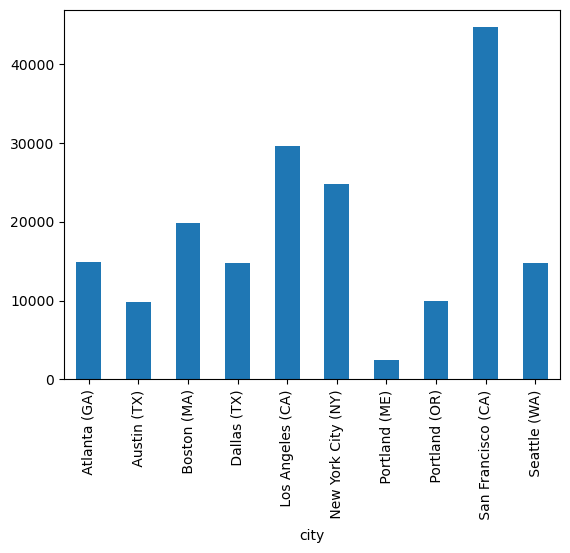

In [47]:
df.groupby('city')['order_id'].count().plot(kind='bar')

In [48]:
df.groupby('city')['sales'].sum()

city
 Atlanta (GA)          2794199.07
 Austin (TX)           1817544.35
 Boston (MA)           3657300.76
 Dallas (TX)           2763659.01
 Los Angeles (CA)      5447304.29
 New York City (NY)    4660526.52
 Portland (ME)          449321.38
 Portland (OR)         1869857.57
 San Francisco (CA)    8252258.67
 Seattle (WA)          2744896.03
Name: sales, dtype: float64

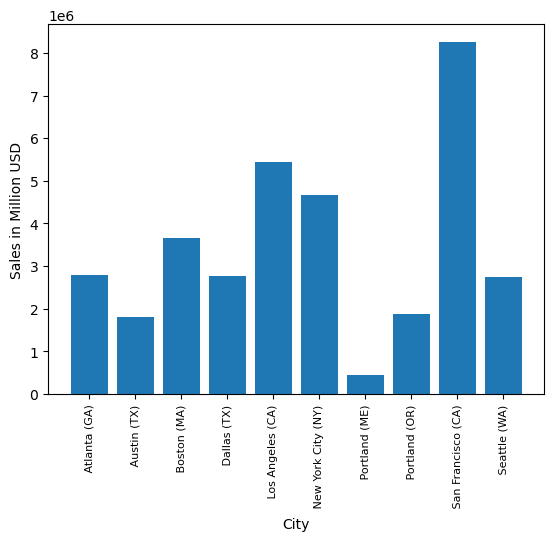

In [49]:
cities =[city for city, df in df.groupby('city')]

plt.bar(cities, df.groupby('city')['sales'].sum())
plt.xticks(cities, rotation = 'vertical', size=8)

plt.ylabel('Sales in Million USD')
plt.xlabel('City')

plt.show()

In [50]:
#### Question 3: What time should we display ads to maximiza the likelihood of customer's buying product?


In [51]:
df.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA)


In [52]:
df.dtypes

order_id                     int64
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
month                    period[M]
sales                      float64
city                        object
dtype: object

In [53]:
df['hour'] = df['order_date'].dt.hour
df['minute'] = df['order_date'].dt.minute
df.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA),22,30


In [54]:
df.groupby('hour')['order_id'].count() # order count by each hour

hour
0      3890
1      2338
2      1238
3       827
4       848
5      1318
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: order_id, dtype: int64

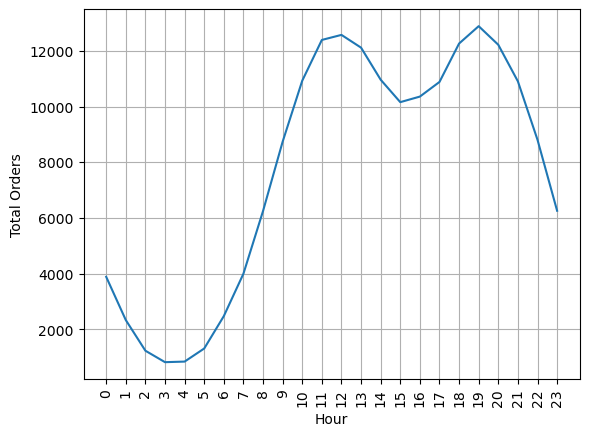

In [55]:
# plot

hours = [hour for hour, df in df.groupby('hour')]

plt.plot(hours, df.groupby('hour')['order_id'].count())
plt.xticks(hours, rotation = 'vertical')
plt.grid()
plt.ylabel('Total Orders')
plt.xlabel('Hour')

plt.show()

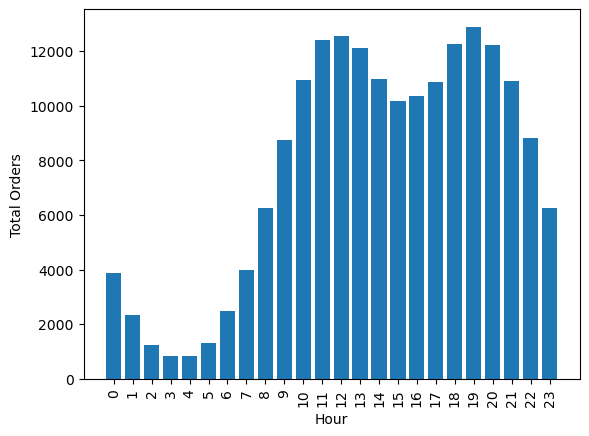

In [56]:
hours = [hour for hour, df in df.groupby('hour')]

plt.bar(hours, df.groupby('hour')['order_id'].count())
plt.xticks(hours, rotation = 'vertical')
plt.ylabel('Total Orders')
plt.xlabel('Hour')

plt.show()

In [57]:
#### Question 4: What prducts are most sold together?



In [58]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),9,27


In [59]:
df[['order_id', 'product']].sort_values('order_id')

,order_id,product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones
...,...,...
25112,319666,Lightning Charging Cable
25113,319667,AA Batteries (4-pack)
25114,319668,Vareebadd Phone
25115,319669,Wired Headphones


In [60]:
df.groupby('order_id')['product'].count().sort_values(ascending=False)

order_id
160873    5
312462    4
263918    4
296353    4
165665    4
         ..
201921    1
201922    1
201923    1
201924    1
319670    1
Name: product, Length: 178406, dtype: int64

In [61]:
df['grouped'] = df.groupby('order_id')['product'].transform(lambda x: ', '.join(x))
df.head(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.00,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),9,27,Wired Headphones


In [62]:
df1 = df[['order_id', 'grouped']]

df1.drop_duplicates(inplace=True)

df1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_5680\2134346214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


,order_id,grouped
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone, Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [63]:
df1['sorted_group'] =df1.grouped.apply(lambda x: ', '.join(sorted(x.split(', '))))

C:\Users\hp\AppData\Local\Temp\ipykernel_5680\1315543310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sorted_group'] =df1.grouped.apply(lambda x: ', '.join(sorted(x.split(', '))))


In [64]:
df1.head()

,order_id,grouped,sorted_group
0,176558,USB-C Charging Cable,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,Bose SoundSport Headphones
3,176560,"Google Phone, Wired Headphones","Google Phone, Wired Headphones"
5,176561,Wired Headphones,Wired Headphones
6,176562,USB-C Charging Cable,USB-C Charging Cable


In [65]:
df1[df1.order_id == 160873]

,order_id,grouped,sorted_group
10836,160873,"iPhone, Lightning Charging Cable, Apple Airpod...","Apple Airpods Headphones, Google Phone, Lightn..."


In [70]:
df1.reset_index(drop=True, inplace=True)
df1.head()

,order_id,grouped,sorted_group
0,176558,USB-C Charging Cable,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,Bose SoundSport Headphones
2,176560,"Google Phone, Wired Headphones","Google Phone, Wired Headphones"
3,176561,Wired Headphones,Wired Headphones
4,176562,USB-C Charging Cable,USB-C Charging Cable


In [72]:
df1['count'] = df1.sorted_group.str.split(',').str.len().sort_values() 

df1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_5680\4100895361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count'] = df1.sorted_group.str.split(',').str.len().sort_values()


,order_id,grouped,sorted_group,count
0,176558,USB-C Charging Cable,USB-C Charging Cable,1
1,176559,Bose SoundSport Headphones,Bose SoundSport Headphones,1
2,176560,"Google Phone, Wired Headphones","Google Phone, Wired Headphones",2
3,176561,Wired Headphones,Wired Headphones,1
4,176562,USB-C Charging Cable,USB-C Charging Cable,1


In [78]:
df2 = df1.query('count > 1').groupby('sorted_group')['order_id'].count().sort_values(ascending=False)

In [80]:
df2

sorted_group
Lightning Charging Cable, iPhone                                                              894
Google Phone, USB-C Charging Cable                                                            869
Wired Headphones, iPhone                                                                      374
USB-C Charging Cable, Vareebadd Phone                                                         318
Google Phone, Wired Headphones                                                                311
                                                                                             ... 
Apple Airpods Headphones, Google Phone, USB-C Charging Cable                                    1
Apple Airpods Headphones, Bose SoundSport Headphones, iPhone                                    1
Apple Airpods Headphones, Bose SoundSport Headphones, Google Phone                              1
AAA Batteries (4-pack), Lightning Charging Cable, iPhone                                        1
Apple A

In [81]:
df2.head(10)

sorted_group
Lightning Charging Cable, iPhone                   894
Google Phone, USB-C Charging Cable                 869
Wired Headphones, iPhone                           374
USB-C Charging Cable, Vareebadd Phone              318
Google Phone, Wired Headphones                     311
Apple Airpods Headphones, iPhone                   298
Bose SoundSport Headphones, Google Phone           169
Vareebadd Phone, Wired Headphones                  110
AA Batteries (4-pack), Lightning Charging Cable    103
Lightning Charging Cable, USB-C Charging Cable      96
Name: order_id, dtype: int64

In [82]:
#### Question 5: Which item was sold the most.


In [85]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas (TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston (MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.00,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles (CA),9,27,Wired Headphones


In [88]:
df.groupby('product')['order_id'].count().sort_values(ascending=False)

product
USB-C Charging Cable          21855
Lightning Charging Cable      21605
AAA Batteries (4-pack)        20609
AA Batteries (4-pack)         20558
Wired Headphones              18848
Apple Airpods Headphones      15521
Bose SoundSport Headphones    13295
27in FHD Monitor               7495
iPhone                         6838
27in 4K Gaming Monitor         6224
34in Ultrawide Monitor         6174
Google Phone                   5521
Flatscreen TV                  4793
Macbook Pro Laptop             4720
ThinkPad Laptop                4124
20in Monitor                   4096
Vareebadd Phone                2064
LG Washing Machine              666
LG Dryer                        646
Name: order_id, dtype: int64

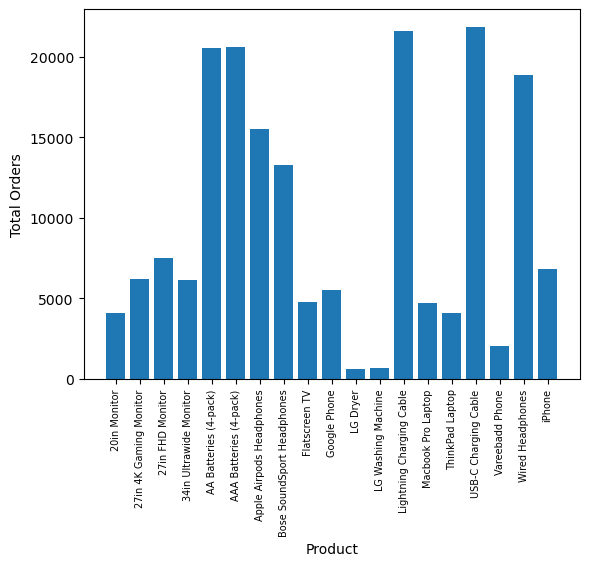

In [90]:
products = [product for product, df in df.groupby('product')]

plt.bar(products, df.groupby('product')['order_id'].count())
plt.xticks(products, rotation = 'vertical', size=7)
plt.ylabel('Total Orders')
plt.xlabel('Product')

plt.show()